In [ ]:
# Customer Churn Analysis – Data Preparation & Exploratory Data Analysis (EDA)

# Project Overview
Customer churn directly impacts revenue, growth, and customer lifetime value.  
This project analyzes customer behavior to identify patterns and drivers of churn.

The objective of this notebook is to:
- Understand the raw customer data
- Clean and preprocess the dataset
- Perform Exploratory Data Analysis (EDA)
- Extract early insights that explain *why customers leave*

These insights will later be validated using SQL and visualized using Power BI.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_palette("Set2")

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("telco.csv")
df.head()


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [4]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [5]:
df.shape


(7043, 50)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,7043,7043,8779-QRDMV,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,7043.0,NaN,NaN,NaN,46.509726,16.750352,19.0,32.0,46.0,60.0,80.0
Under 30,7043,2,No,5642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Senior Citizen,7043,2,No,5901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,5416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Dependents,7043.0,NaN,NaN,NaN,0.468692,0.962802,0.0,0.0,0.0,0.0,9.0
Country,7043,1,United States,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,7043,1,California,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dataset Summary
- Rows represent individual customers
- Columns include demographics, service usage, contract details, and churn status
- Both numerical and categorical features are present
- Target variable: **Churn**


In [8]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [9]:
(df.isnull().sum()/len(df))*100

Customer ID                           0.000000
Gender                                0.000000
Age                                   0.000000
Under 30                              0.000000
Senior Citizen                        0.000000
Married                               0.000000
Dependents                            0.000000
Number of Dependents                  0.000000
Country                               0.000000
State                                 0.000000
City                                  0.000000
Zip Code                              0.000000
Latitude                              0.000000
Longitude                             0.000000
Population                            0.000000
Quarter                               0.000000
Referred a Friend                     0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                55.047565
Phone Service                         0.000000
Avg Monthly L

In [ ]:
# Data Quality Observations
- Missing values exist in service usage and churn reason fields
- Geographic and identifier fields may not contribute to churn prediction
- Some numerical columns require validation for outliers and skewness


In [ ]:
# Data Quality Observations
- Missing values are present in specific columns
- Some numerical fields are incorrectly stored as categorical
- Certain columns may not add predictive value


In [13]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")
df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)


In [16]:
df.drop(columns=["Customer ID"], inplace=True)

In [18]:
df["Churn Label"] = df["Churn Label"].map({"Yes": 1, "No": 0})


In [20]:
df["Tenure Group"] = pd.cut(
    df["Tenure in Months"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-1 year", "1-2 years", "2-4 years", "4+ years"]
)


In [ ]:
# Why Feature Engineering?
Grouping tenure helps understand churn behavior across customer lifecycle stages.


In [21]:
df["Avg Revenue per Month"] = df["Total Revenue"] / df["Tenure in Months"].replace(0,1)


In [22]:
churn_rate = df["Churn Label"].mean() * 100
churn_rate


26.536987079369588

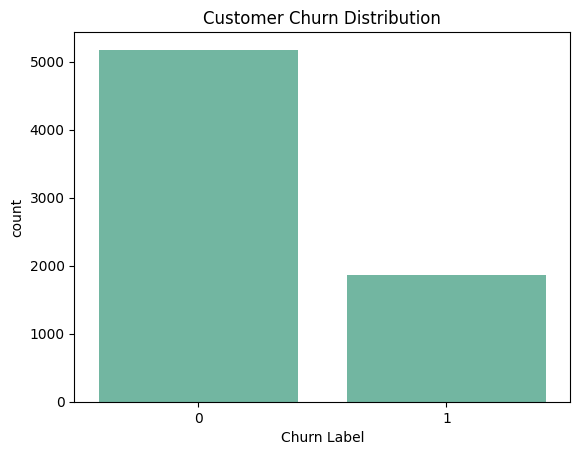

In [23]:
sns.countplot(x="Churn Label", data=df)
plt.title("Customer Churn Distribution")
plt.show()


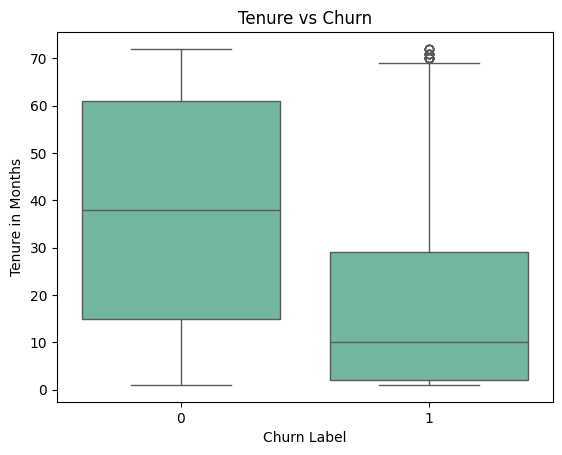

In [24]:
sns.boxplot(x="Churn Label", y="Tenure in Months", data=df)
plt.title("Tenure vs Churn")
plt.show()


In [ ]:
# This shows early-tenure customers are more likely to churn

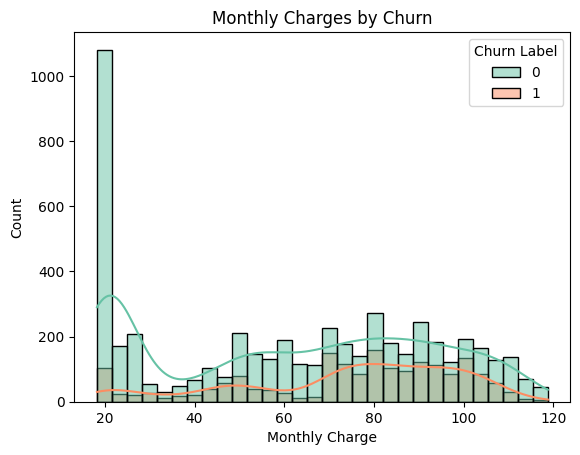

In [25]:
sns.histplot(
    data=df,
    x="Monthly Charge",
    hue="Churn Label",
    bins=30,
    kde=True
)
plt.title("Monthly Charges by Churn")
plt.show()


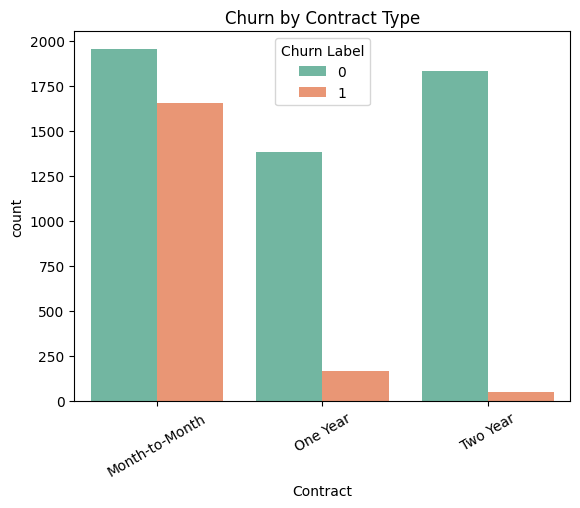

In [26]:
sns.countplot(x="Contract", hue="Churn Label", data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=30)
plt.show()


In [ ]:
#Month-to-month contracts have the highest churn risk

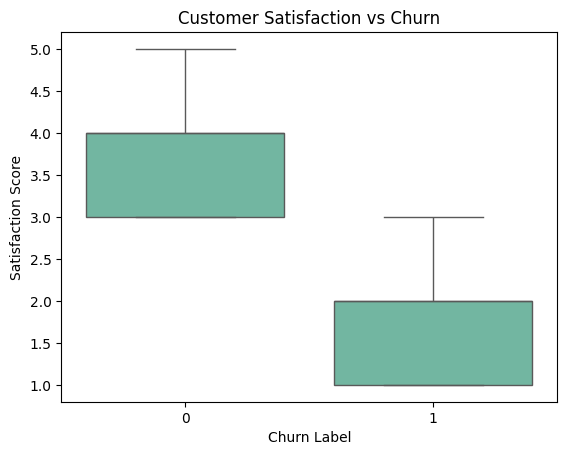

In [27]:
sns.boxplot(x="Churn Label", y="Satisfaction Score", data=df)
plt.title("Customer Satisfaction vs Churn")
plt.show()


In [ ]:
#Low satisfaction is a major churn indicator.

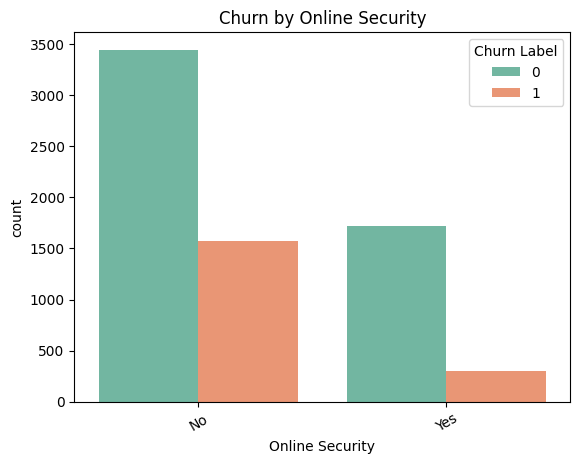

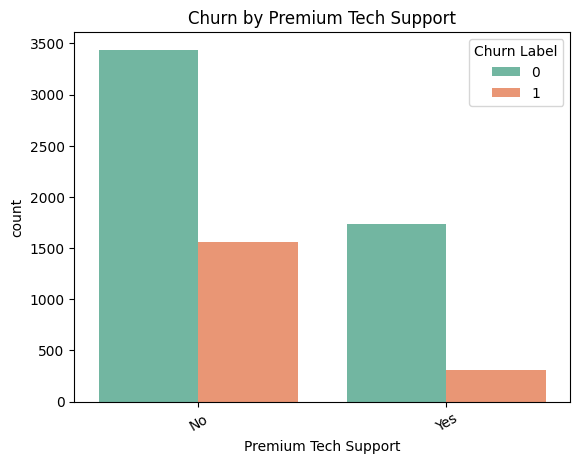

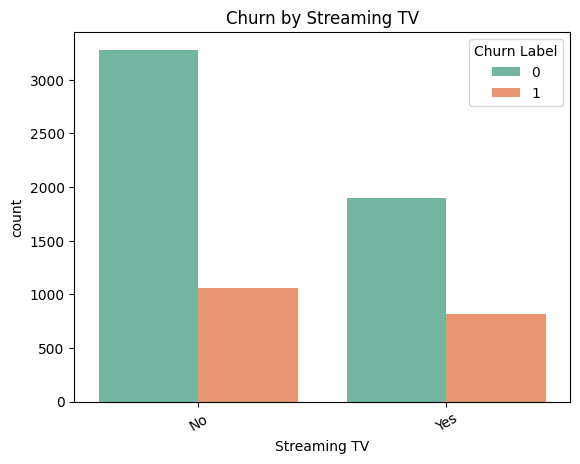

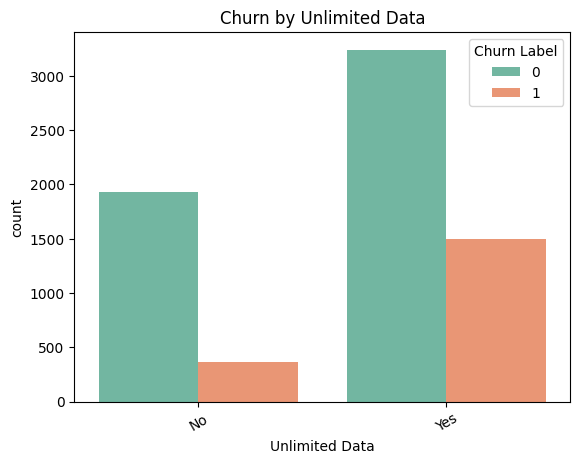

In [28]:
service_cols = [
    "Online Security", "Premium Tech Support",
    "Streaming TV", "Unlimited Data"
]

for col in service_cols:
    sns.countplot(x=col, hue="Churn Label", data=df)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=30)
    plt.show()


In [29]:
df.groupby("Churn Label")["Total Revenue"].mean()


Churn Label
0    3418.374927
1    1971.353569
Name: Total Revenue, dtype: float64

In [ ]:
# Revenue Insight
Churned customers contribute significantly less lifetime revenue, reinforcing
the importance of early retention strategies.


In [ ]:
# Key Insights from EDA

1. Customers with short tenure have the highest churn risk
2. Month-to-month contracts significantly increase churn probability
3. Higher monthly charges correlate with increased churn
4. Customers lacking premium support or security services churn more
5. Low satisfaction scores strongly predict churn
6. Churn directly reduces Customer Lifetime Value (CLTV)

These insights will be validated using SQL queries and presented through
interactive Power BI dashboards for stakeholder decision-making.


In [31]:
df.to_csv("cleaned_customer_churn.csv", index=False)


In [5]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)


In [6]:
df.columns


Index(['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'married',
       'dependents', 'number_of_dependents', 'country', 'state', 'city',
       'zip_code', 'latitude', 'longitude', 'population', 'quarter',
       'referred_a_friend', 'number_of_referrals', 'tenure_in_months', 'offer',
       'phone_service', 'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'satisfaction_score', 'customer_status', 'churn_label',
       'churn_score', 'cltv', 'churn_category', 'churn_reason'],
      dtype='object')

In [8]:
df.to_csv("cleaned_churn.csv", index=False)


In [9]:
df.shape

(7043, 50)

In [10]:
list(df.columns)

['customer_id',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'dependents',
 'number_of_dependents',
 'country',
 'state',
 'city',
 'zip_code',
 'latitude',
 'longitude',
 'population',
 'quarter',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason']